In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X :  (100, 2)
Dimensions dde y :  (100, 1)


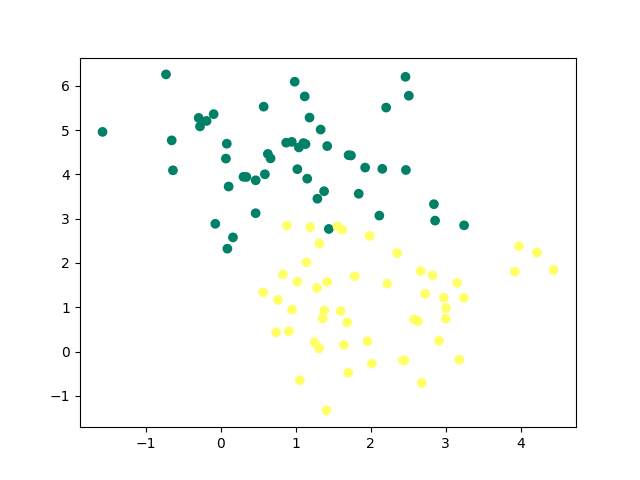

In [16]:
X,y = make_blobs(n_samples=100, n_features=2, centers = 2 , random_state = 0)
y = y.reshape((y.shape[0], 1))

print ('Dimensions de X : ', X.shape)
print ('Dimensions dde y : ', y.shape)

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.show()

In [17]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W,b)

In [21]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1+ np.exp(-Z))
    return A

In [23]:
def log_loss(A,y) :
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1-A))

In [25]:
def gradients(A,X,y):
    dW = 1/ len(y) * np.dot(X.T , A-y)
    db = 1/ len(y) * np.sum(A-y)
    return (dW , db)

In [29]:
def update (dW,db,W,b,learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W,b)


In [43]:
def predict (X,W,b):
    A = model(X,W,b)
    print(A)
    return A >= 0.5


In [35]:
from sklearn.metrics import accuracy_score


In [38]:
def artificial_neuron(X,y, learning_rate = 0.1,n_iter = 100) :
    #initialisation W ,b
    W,b = initialisation(X)
    Loss = []
    
    for i in range(n_iter) : 
        A = model(X, W,b)
        Loss.append(log_loss(A,y))
        dW,db = gradients(A,X,y)
        W, b = update(dW,db , W,b,learning_rate)
    y_pred = predict(X,W,b)
    print(accuracy_score(y,y_pred))
    plt.plot(Loss)
    plt.show()
    return (W,b)

0.92


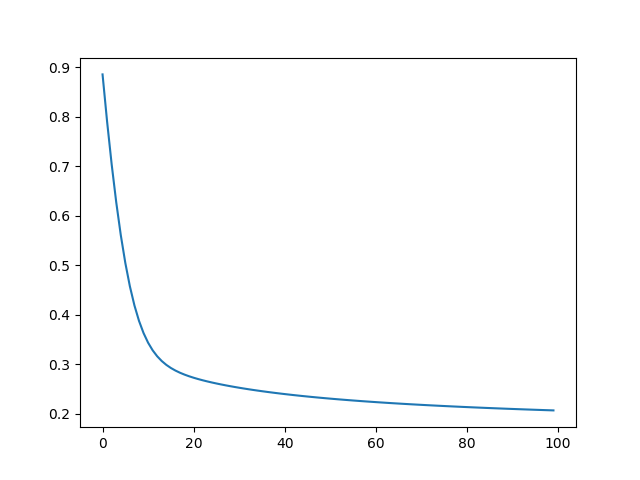

In [39]:
W,b = artificial_neuron(X,y)

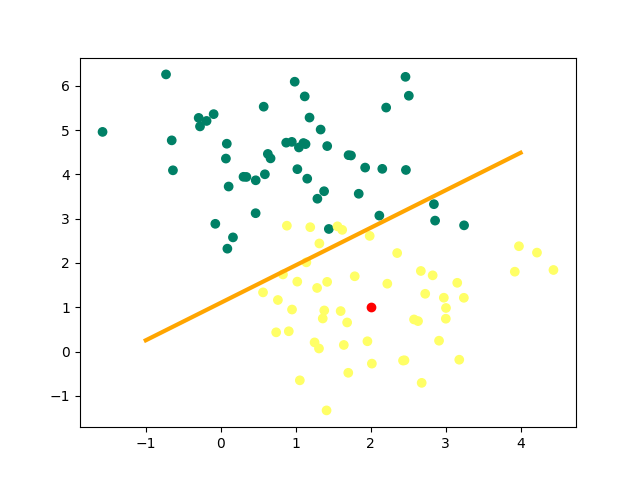

[0.8894896]


array([ True])

In [45]:
new_plant = np.array([2,1])
x0 = np.linspace(-1,4,100)
x1 = ( -W[0] * x0 - b ) / W[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')
plt.scatter(new_plant[0],new_plant[1], c='r')
plt.plot(x0,x1,c='orange',lw=3)
plt.show()
predict(new_plant,W,b)